# Lab 0.1: Data Exploration

## Step 1: Raw Data Loading & Cleaning

In [10]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

# Import Data
inbound_df = pd.read_csv("./data/Inbound.csv")
inventory_df = pd.read_csv("./data/Inventory.csv")
material_master_df = pd.read_csv("./data/MaterialMaster.csv")
operation_cost_df = pd.read_csv("./data/OperationCost.csv")
outbound_df = pd.read_csv("./data/Outbound.csv")

inbound_df.rename(columns={'INBOUND_DATE': 'DATE'}, inplace=True)
outbound_df.rename(columns={'OUTBOUND_DATE': 'DATE'}, inplace=True)
inventory_df['DATE'] = pd.to_datetime(inventory_df['BALANCE_AS_OF_DATE'], format='%m/%d/%Y')
# inventory_df.rename(columns={'BALANCE_AS_OF_DATE': 'DATE'}, inplace=True)


#### Data Cleaning

In [11]:
# Deleting null values
print("Inbound :\n", inbound_df.isnull().sum())
print("\nInventory :\n", inventory_df.isnull().sum())
print("\nMaterials :\n", material_master_df.isnull().sum())
print("\nOperation Costs :\n", operation_cost_df.isnull().sum())
print("\nOutbound :\n", outbound_df.isnull().sum())
inventory_df = inventory_df.dropna()
outbound_df = outbound_df.dropna()

Inbound :
 DATE               0
PLANT_NAME         0
MATERIAL_NAME      0
NET_QUANTITY_MT    0
dtype: int64

Inventory :
 BALANCE_AS_OF_DATE    0
PLANT_NAME            0
MATERIAL_NAME         0
BATCH_NUMBER          1
UNRESRICTED_STOCK     0
STOCK_UNIT            0
STOCK_SELL_VALUE      0
CURRENCY              0
DATE                  0
dtype: int64

Materials :
 MATERIAL_NAME                   0
POLYMER_TYPE                    0
SHELF_LIFE_IN_MONTH             0
DOWNGRADE_VALUE_LOST_PERCENT    0
dtype: int64

Operation Costs :
 Operation                  0
Plant/Mode of Transport    0
Cost                       0
Currency                   0
dtype: int64

Outbound :
 DATE                 0
PLANT_NAME           0
MODE_OF_TRANSPORT    0
MATERIAL_NAME        4
CUSTOMER_NUMBER      0
NET_QUANTITY_MT      0
dtype: int64


In [12]:
# Deleting duplicates
print("Inbound :\n", inbound_df.duplicated().sum())
print("\nInventory :\n", inventory_df.duplicated().sum())
print("\nMaterials :\n", material_master_df.duplicated().sum())
print("\nOperation Costs :\n", operation_cost_df.duplicated().sum())
print("\nOutbound :\n", outbound_df.duplicated().sum())
# inbound_df = inbound_df.drop_duplicates()
# inventory_df = inventory_df.drop_duplicates()
# outbound_df = outbound_df.drop_duplicates()

Inbound :
 13143

Inventory :
 723

Materials :
 0

Operation Costs :
 0

Outbound :
 4811


In [13]:
# Looking at zeroes
print("Inventory stock:\n", (inventory_df['UNRESRICTED_STOCK'] == 0).sum())
print("\nInventory sell value:\n", (inventory_df['STOCK_SELL_VALUE'] == 0).sum())
print("\nInbound quantity:\n", (inbound_df['NET_QUANTITY_MT'] == 0).sum())
print("\nOutbound quantity:\n", (outbound_df['NET_QUANTITY_MT'] == 0).sum())
inventory_df_sus = inventory_df[((inventory_df['UNRESRICTED_STOCK'] == 0) & (inventory_df['STOCK_SELL_VALUE'] != 0)) | ((inventory_df['UNRESRICTED_STOCK'] != 0) & (inventory_df['STOCK_SELL_VALUE'] == 0))]
print("\nInventory 1 zero:\n", len(inventory_df_sus))
inventory_df_skibidi = inventory_df[(inventory_df['UNRESRICTED_STOCK'] == 0) & (inventory_df['STOCK_SELL_VALUE'] == 0)]
print("\nInventory 2 zeroes:\n", len(inventory_df_skibidi))

Inventory stock:
 1698

Inventory sell value:
 407

Inbound quantity:
 0

Outbound quantity:
 1

Inventory 1 zero:
 1907

Inventory 2 zeroes:
 99


In [14]:
# Check primary key
inventory_pk = inventory_df[['BALANCE_AS_OF_DATE','PLANT_NAME', 'MATERIAL_NAME', 'BATCH_NUMBER']]
inventory_pk[inventory_pk.duplicated(keep=False)]
#inventory_df.iloc[[516, 519]]

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER
151,12/31/2023,CHINA-WAREHOUSE,MAT-0095,SCRAP
152,12/31/2023,CHINA-WAREHOUSE,MAT-0095,SCRAP
516,12/31/2023,CHINA-WAREHOUSE,MAT-0278,3409A
519,12/31/2023,CHINA-WAREHOUSE,MAT-0278,3409A
1350,1/31/2024,CHINA-WAREHOUSE,MAT-0278,3409A
...,...,...,...,...
28317,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M8335C
28318,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M7439A
28319,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M3452B
28320,12/31/2024,SINGAPORE-WAREHOUSE,MAT-0172,M9070B


#### CSV Previews

In [15]:
# Show Inbound Data
inbound_df.head()

,DATE,PLANT_NAME,MATERIAL_NAME,NET_QUANTITY_MT
0,2023/12/15,SINGAPORE-WAREHOUSE,MAT-0354,23.375
1,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,1.375
2,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,23.375
3,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,24.750
4,2023/12/22,SINGAPORE-WAREHOUSE,MAT-0413,19.250


In [16]:
# Show Inventory Data
inventory_df.head()

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY,DATE
0,12/31/2023,CHINA-WAREHOUSE,MAT-0045,SCRAP,164,KG,211,CNY,2023-12-31
1,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6024,0,KG,87666,CNY,2023-12-31
2,12/31/2023,CHINA-WAREHOUSE,MAT-0193,5755,70720,KG,414419,CNY,2023-12-31
3,12/31/2023,CHINA-WAREHOUSE,MAT-0193,3142,12240,KG,71726,CNY,2023-12-31
4,12/31/2023,CHINA-WAREHOUSE,MAT-0193,6734,2720,KG,15939,CNY,2023-12-31


In [17]:
# Show Material Master Data
material_master_df.head()


,MATERIAL_NAME,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT
0,MAT-0001,P-002,3,40
1,MAT-0002,P-001,8,15
2,MAT-0003,P-004,2,35
3,MAT-0004,P-002,3,35
4,MAT-0005,P-002,5,20


In [18]:
# Show Operation Cost Data
operation_cost_df.head()

,Operation,Plant/Mode of Transport,Cost,Currency
0,Inventory Storage per MT per day,SINGAPORE WAREHOUSE,15.0,SGD
1,Inventory Storage per MT per day,CHINA WAREHOUSE,1.7,CNY
2,Transfer cost per container (24.75MT),Truck,150.0,SGD
3,Transfer cost per container (24.75MT),Marine,75.0,USD


In [19]:
# Show Outbound Data
outbound_df.head()

,DATE,PLANT_NAME,MODE_OF_TRANSPORT,MATERIAL_NAME,CUSTOMER_NUMBER,NET_QUANTITY_MT
0,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0013,CST-00001,25.5
1,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0013,CST-00001,25.5
2,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0268,CST-00002,25.5
3,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0268,CST-00002,25.5
4,2024/01/02,CHINA-WAREHOUSE,Truck,MAT-0268,CST-00002,25.5


In [20]:
# Data Information
print("Inbound " + str(inbound_df.shape))
print("Inventory " + str(inventory_df.shape))
print("Material Master " + str(material_master_df.shape))
print("Operation Cost " + str(operation_cost_df.shape))
print("Outbound " + str(outbound_df.shape))

Inbound (19593, 4)
Inventory (28327, 9)
Material Master (431, 4)
Operation Cost (4, 4)
Outbound (26990, 6)


## Step 2: Filter by month

In [21]:
def filter_by_month(df, month_num, year, country, col_name='NET_QUANTITY_MT', divide_by = 1):
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y/%m/%d', errors='coerce')
    month_df = df[df['DATE'].dt.month == month_num]
    month_df = month_df[month_df['DATE'].dt.year == year]
    month_country_df = month_df[month_df['PLANT_NAME'] == country + '-WAREHOUSE']
    total = month_country_df[col_name].sum()
    print("Month"+str(month_num)+": "+str(total/1000/divide_by)+" KT")


In [22]:
country = "SINGAPORE"
print("Country: " + country)
for i in range(12):
    filter_by_month(outbound_df,i+1, 2024, country)

Country: SINGAPORE
Month1: 8.030355 KT
Month2: 10.046795 KT
Month3: 11.107854999999999 KT
Month4: 8.797185 KT
Month5: 10.50195 KT
Month6: 12.455665000000002 KT
Month7: 12.30593 KT
Month8: 13.300645000000001 KT
Month9: 12.277775000000002 KT
Month10: 15.154065000000001 KT
Month11: 14.412775 KT
Month12: 11.252095 KT


In [23]:
country = "SINGAPORE"
print("Country: " + country)
for i in range(12):
    filter_by_month(inbound_df, i+1, 2024, country)

Country: SINGAPORE
Month1: 6.867 KT
Month2: 7.128995 KT
Month3: 15.858001 KT
Month4: 14.02735 KT
Month5: 12.248625 KT
Month6: 6.2335 KT
Month7: 8.659 KT
Month8: 15.97175 KT
Month9: 10.510625 KT
Month10: 9.60075 KT
Month11: 4.34475 KT
Month12: 0.54 KT


In [24]:
country = "CHINA"
print("Country: " + country)
for i in range(12):
    filter_by_month(inventory_df, i+1, 2024, country, "UNRESRICTED_STOCK", divide_by=1000)

Country: CHINA
Month1: 39.023693 KT
Month2: 46.217648000000004 KT
Month3: 48.478708 KT
Month4: 48.415015 KT
Month5: 52.826485999999996 KT
Month6: 72.54776600000001 KT
Month7: 76.14712399999999 KT
Month8: 68.138683 KT
Month9: 66.701368 KT
Month10: 62.785368999999996 KT
Month11: 54.764596 KT
Month12: 72.67717 KT


In [25]:
def inventory_filter_by_month(month_num, year, country):
    inbound_df['INBOUND_DATE'] = pd.to_datetime(inbound_df['INBOUND_DATE'], format='%Y/%m/%d', errors='coerce')
    month_df = inbound_df[inbound_df['INBOUND_DATE'].dt.month == month_num]
    month_df = month_df[month_df['INBOUND_DATE'].dt.year == year]
    month_country_df = month_df[month_df['PLANT_NAME'] == country + '-WAREHOUSE']
    total = month_country_df['NET_QUANTITY_MT'].sum()
    print("Month"+str(month_num)+": "+str(total/1000))


## Step 3: Find out if sales downgrade is calculated already or not

In [26]:
# Merge datasets
batch_merged_df = pd.merge(inventory_df, material_master_df, on='MATERIAL_NAME')
# Filter out 'SCRAP' batches
batch_merged_df = batch_merged_df[~batch_merged_df['BATCH_NUMBER'].str.contains('SCRAP', na=False)]
# Filter for batch numbers that are in inventory for more than shelf life
batch_counts = batch_merged_df['BATCH_NUMBER'].value_counts().rename('BATCH_COUNT')
batch_merged_df = batch_merged_df.merge(batch_counts, left_on='BATCH_NUMBER', right_index=True)
batch_filtered_df = batch_merged_df[batch_merged_df['BATCH_COUNT'] > batch_merged_df['SHELF_LIFE_IN_MONTH']]
batch_filtered_df = batch_filtered_df.sort_values(by='BATCH_COUNT', ascending=False)
# Divide sales value by quantity to get per MT
batch_filtered_df['VALUE_PER_KG'] = batch_filtered_df['STOCK_SELL_VALUE'] / (batch_filtered_df['UNRESRICTED_STOCK'])
batch_filtered_df = batch_filtered_df.sort_values(by='BALANCE_AS_OF_DATE', ascending=False)
# Check the sales value for those items if they go down by the percentage
batch_filtered_df[batch_filtered_df['BATCH_NUMBER'] == '2098']

,BALANCE_AS_OF_DATE,PLANT_NAME,MATERIAL_NAME,BATCH_NUMBER,UNRESRICTED_STOCK,STOCK_UNIT,STOCK_SELL_VALUE,CURRENCY,DATE,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,BATCH_COUNT,VALUE_PER_KG
24590,9/30/2024,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,5620,SGD,2024-09-30,P-002,11,20,13,0.590026
23534,8/31/2024,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,5620,SGD,2024-08-31,P-002,11,20,13,0.590026
22506,7/31/2024,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,5620,SGD,2024-07-31,P-002,11,20,13,0.590026
21574,6/30/2024,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,5620,SGD,2024-06-30,P-002,11,20,13,0.590026
20642,5/31/2024,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,5620,SGD,2024-05-31,P-002,11,20,13,0.590026
19824,4/30/2024,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,5620,SGD,2024-04-30,P-002,11,20,13,0.590026
18865,3/31/2024,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,6191,SGD,2024-03-31,P-002,11,20,13,0.649974
18864,3/31/2024,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,6191,SGD,2024-03-31,P-002,11,20,13,0.649974
17661,2/29/2024,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,6001,SGD,2024-02-29,P-002,11,20,13,0.630026
16139,12/31/2023,SINGAPORE-WAREHOUSE,MAT-0088,2098,9525,KG,6668,SGD,2023-12-31,P-002,11,20,13,0.700052


In [27]:
# Scrap batches
scrap_df = inventory_df[inventory_df['BATCH_NUMBER'].str.contains('SCRAP', na=False)]
scrap_df['BATCH_NUMBER'].unique()

array(['SCRAP', 'SCRAP-4170', 'SCRAP-6113', 'SCRAP-6946', 'SCRAP-4561',
       'SCRAP-1660', 'SCRAP-2908', 'SCRAP-5415', 'SCRAP-5786',
       'SCRAP-4917', 'SCRAP-1047', 'SCRAP-7654', 'SCRAP-9327',
       'SCRAP-2264', 'SCRAP-6862', 'SCRAP-3867', 'SCRAP-9281',
       'SCRAP-6847', 'SCRAP-3929', 'SCRAP-9732', 'SCRAP-1201',
       'SCRAP-3594', 'SCRAP-7283', 'SCRAP-9510', 'SCRAP-9801',
       'SCRAP-4253'], dtype=object)

In [28]:
# Unscrapped batches
unscrapped_df = inventory_df[~inventory_df['BATCH_NUMBER'].str.contains('SCRAP', na=False)]
unscrapped_df['BATCH_NUMBER'].unique()
unscrapped_duplicates = unscrapped_df.groupby('BATCH_NUMBER')['MATERIAL_NAME'].nunique()
violations = unscrapped_duplicates[unscrapped_duplicates > 1]
violations

BATCH_NUMBER
1239A        2
1309A2078    2
1349A6439    2
1549A        2
1563A        2
            ..
V6100A       2
V7115A       2
V9006A       2
V9383A       2
V9606A       2
Name: MATERIAL_NAME, Length: 298, dtype: int64

## Step 4: Plot Graph

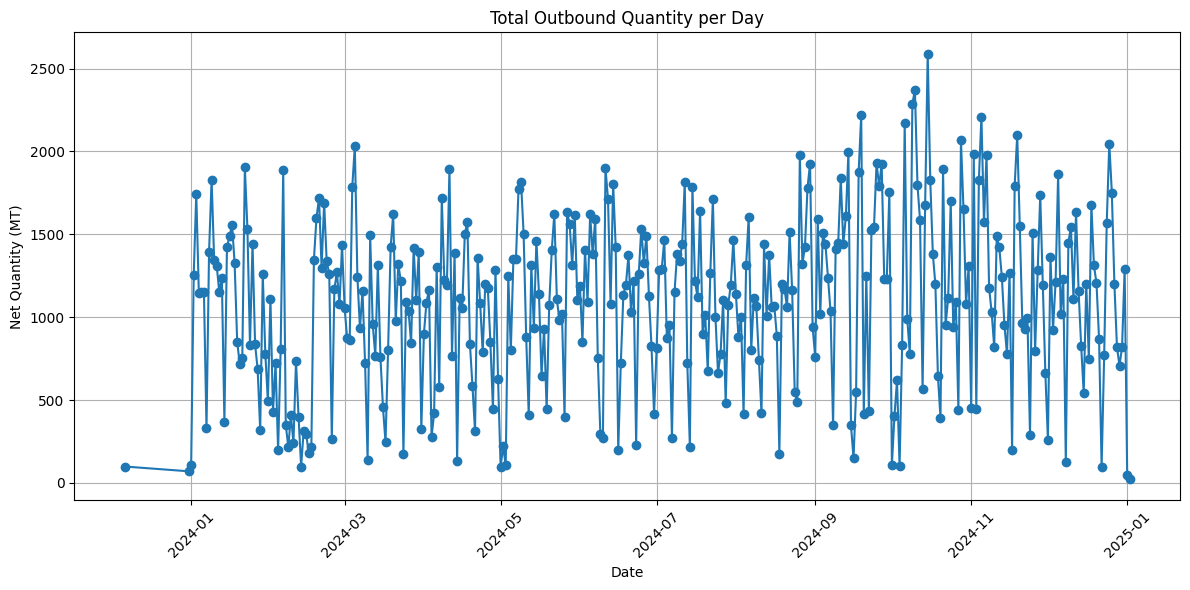

In [29]:
# Outbound per day
outbound_daily = outbound_df.groupby('DATE')['NET_QUANTITY_MT'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(outbound_daily['DATE'], outbound_daily['NET_QUANTITY_MT'], marker='o', linestyle='-')
plt.title('Total Outbound Quantity per Day')
plt.xlabel('Date')
plt.ylabel('Net Quantity (MT)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

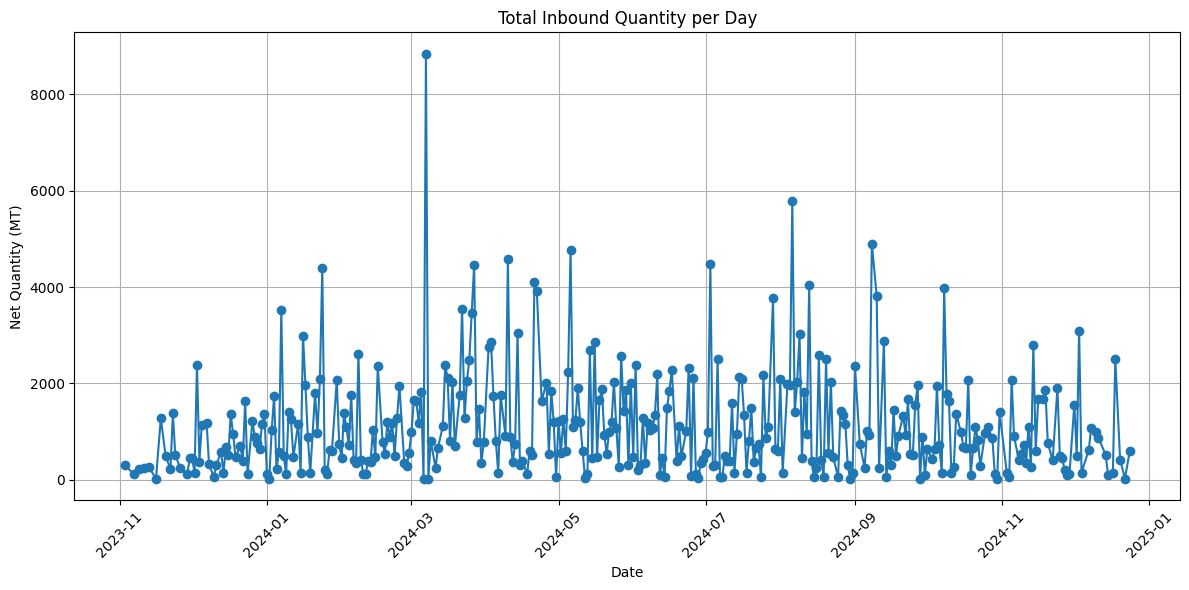

In [30]:
# Inbound per day
inbound_daily = inbound_df.groupby('DATE')['NET_QUANTITY_MT'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(inbound_daily['DATE'], inbound_daily['NET_QUANTITY_MT'], marker='o', linestyle='-')
plt.title('Total Inbound Quantity per Day')
plt.xlabel('Date')
plt.ylabel('Net Quantity (MT)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Find the Average Price of Each Material

In [31]:
# Find average price function
unscrapped_df
def get_avg_price(material, country):
    material_df = unscrapped_df[unscrapped_df['MATERIAL_NAME'] == material]
    material_df = material_df[material_df['PLANT_NAME'] == country + '-WAREHOUSE']
    material_df['BALANCE_AS_OF_DATE'] = pd.to_datetime(material_df['DATE'], format='%Y/%m/%d', errors='coerce')
    first_seen_df = material_df.groupby('BATCH_NUMBER')['BALANCE_AS_OF_DATE'].min().reset_index()
    merged_df = material_df.merge(
        first_seen_df,
        on='BATCH_NUMBER',
        suffixes=('', '_FIRST_SEEN')
    )
    first_entries = merged_df[merged_df['BALANCE_AS_OF_DATE'] == merged_df['BALANCE_AS_OF_DATE_FIRST_SEEN']]
    first_entries = first_entries[first_entries['UNRESRICTED_STOCK'] > 0]
    first_entries['SELL_VALUE_PER_UNIT'] = first_entries['STOCK_SELL_VALUE'] / first_entries['UNRESRICTED_STOCK']
    if first_entries['SELL_VALUE_PER_UNIT'].count() == 0:
        avg_price = 0
    else:
        avg_price = first_entries['SELL_VALUE_PER_UNIT'].sum() / first_entries['SELL_VALUE_PER_UNIT'].count()
    return(avg_price)

### Create New CSV for Average Price

In [35]:
temp_data = []

for value in material_master_df['MATERIAL_NAME']:
    avg_price = get_avg_price(value, 'CHINA')
    temp_data.append({'MATERIAL_NAME': value, 'AVERAGE_PRICE': avg_price})

avg_price_df = pd.DataFrame(temp_data)
print(avg_price_df)


    MATERIAL_NAME  AVERAGE_PRICE
0        MAT-0001      12.030033
1        MAT-0002       7.590002
2        MAT-0003       0.929996
3        MAT-0004      10.620644
4        MAT-0005       7.120000
..            ...            ...
426      MAT-0427       0.000000
427      MAT-0428       4.510007
428      MAT-0429      10.750588
429      MAT-0430       2.930738
430      MAT-0431       0.000000

[431 rows x 2 columns]


In [38]:
material_master_w_avg_price_df = material_master_df.join(avg_price_df.set_index('MATERIAL_NAME'), on='MATERIAL_NAME')

In [39]:
material_master_w_avg_price_df.head()

,MATERIAL_NAME,POLYMER_TYPE,SHELF_LIFE_IN_MONTH,DOWNGRADE_VALUE_LOST_PERCENT,AVERAGE_PRICE
0,MAT-0001,P-002,3,40,12.030033
1,MAT-0002,P-001,8,15,7.590002
2,MAT-0003,P-004,2,35,0.929996
3,MAT-0004,P-002,3,35,10.620644
4,MAT-0005,P-002,5,20,7.120000


In [40]:
material_master_w_avg_price_df.to_csv('./data/MaterialMaster_with_avg_price.csv', index=False)